# SVM with HOG

An article on HOG: https://medium.com/analytics-vidhya/a-gentle-introduction-into-the-histogram-of-oriented-gradients-fdee9ed8f2aa

In [1]:
import cv2
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from skimage import exposure
import matplotlib.pyplot as plt
import random

In [2]:
# Load data
data_array = np.load('data.npy').T
label_array = np.load('labels.npy')

train_df, test_df, train_df_labels, test_df_labels = train_test_split(pd.DataFrame(data_array), pd.DataFrame(label_array), test_size=0.2, random_state=42)

In [3]:
# reshaping data to 300x300,3 for RGB images of 300 by 300 pixels
X_train = train_df.values.reshape(-1,300,300,3)
X_test=test_df.values.reshape(-1,300,300,3)

y_train = train_df_labels.values.ravel()
y_test=test_df_labels.values.ravel()

In [4]:
def extract_hog_features(images):
    hog_features = []
    for image in images:
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Compute HOG features
        features, _ = hog(gray_image, pixels_per_cell=(32, 32),
                                  cells_per_block=(4, 4), block_norm="L2-Hys", visualize=True)
        hog_features.append(features)
    return hog_features

# Extract HOG features for training and testing sets
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

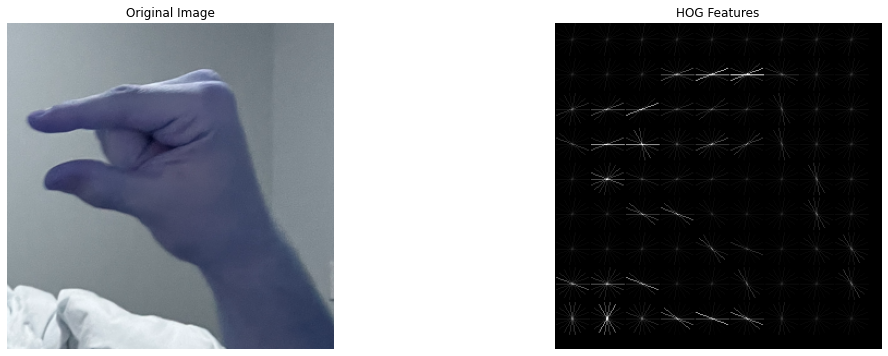

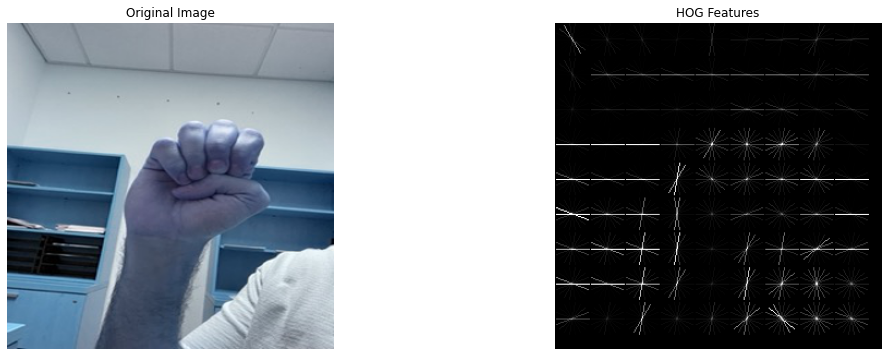

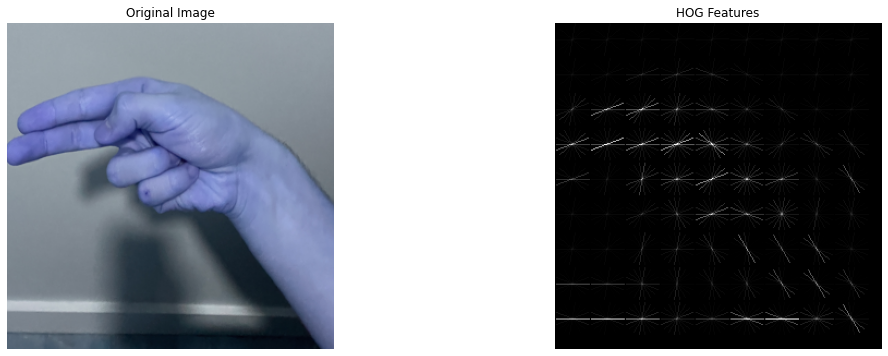

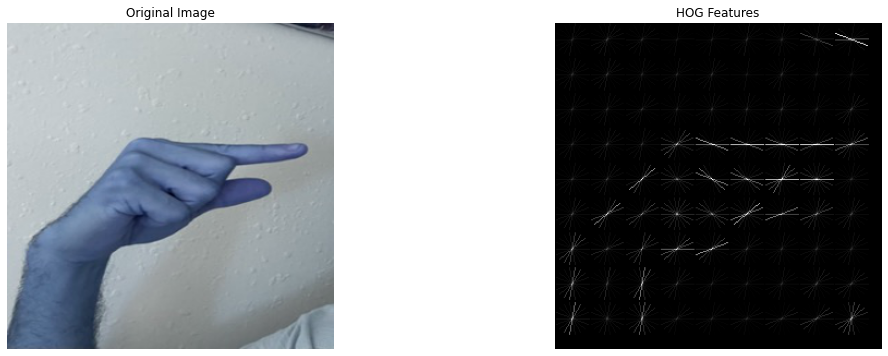

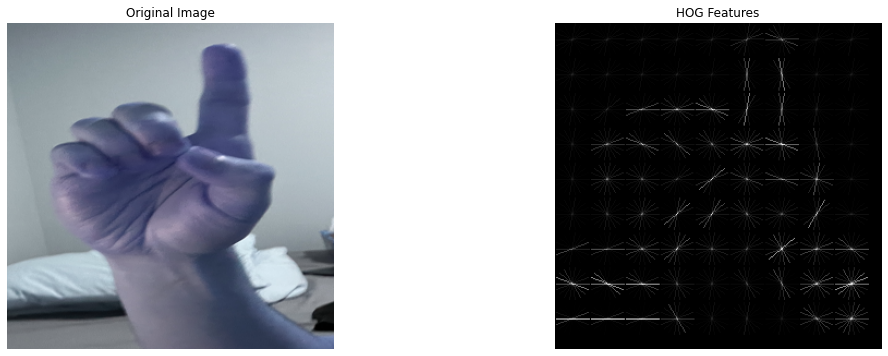

In [5]:
# Define a function to extract and visualize HOG features
def visualize_hog_features(images, num_images_to_visualize=5):
    # Randomly select a subset of images for visualization
    selected_indices = random.sample(range(len(images)), num_images_to_visualize)

    for i, idx in enumerate(selected_indices):
        image = images[idx]
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Compute HOG features
        features, hog_image = hog(gray_image, pixels_per_cell=(32, 32),
                                  cells_per_block=(4, 4), block_norm="L2-Hys", visualize=True)
        
        # Rescale the HOG image for better visualization
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

        # Plot the original image and the HOG feature visualization
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
        plt.title('HOG Features')
        plt.axis('off')

    plt.show()

# Visualize HOG features for 5 randomly selected images in the training set
visualize_hog_features(X_train, num_images_to_visualize=5)

In [6]:
scaler = StandardScaler()
X_train_hog = scaler.fit_transform(X_train_hog)
X_test_hog = scaler.transform(X_test_hog)

In [7]:
# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100]  # Adjust the values based on your preferences
}

# Create an SVM classifier
svm_classifier = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_hog, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'kernel': 'linear'}


In [8]:
# Get the best SVM classifier
best_svm_classifier = grid_search.best_estimator_

In [9]:
y_pred_train = best_svm_classifier.predict(X_train_hog)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Accuracy in Training: {accuracy * 100:.2f}%")

Accuracy in Training: 100.00%


In [10]:
y_pred = best_svm_classifier.predict(X_test_hog)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy in Test: {accuracy * 100:.2f}%")

Accuracy in Test: 85.19%


In [11]:
prediction = best_svm_classifier.predict(X_test_hog[3].reshape(1, -1))

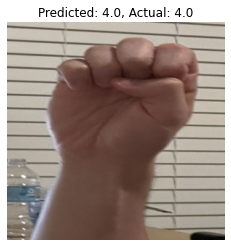

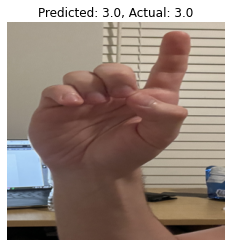

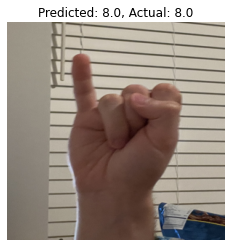

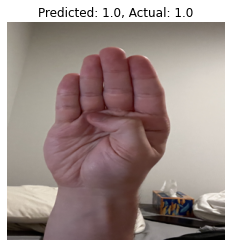

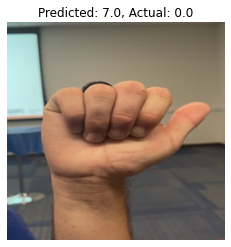

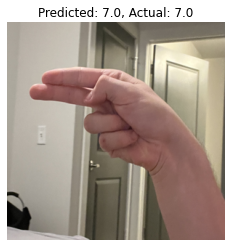

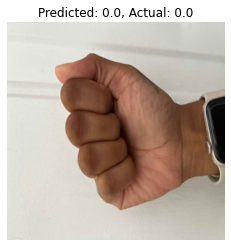

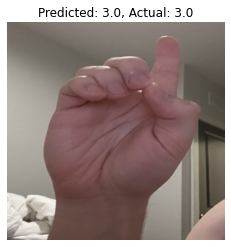

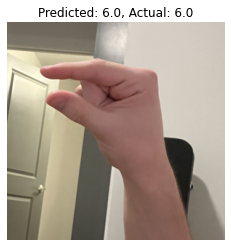

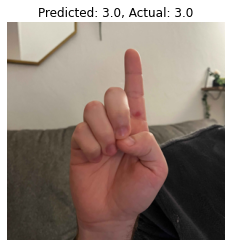

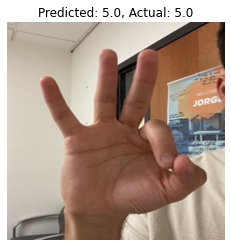

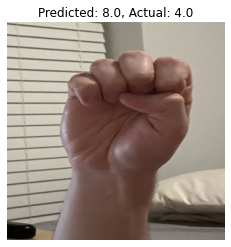

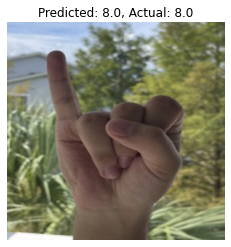

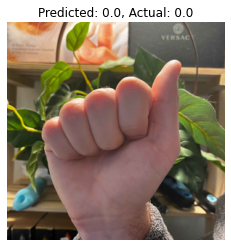

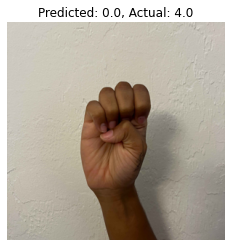

In [12]:
# Assuming you have X_test_hog, y_test, svm_classifier, and a scaler

# Randomly select 5 indices from X_test_hog
num_samples_to_visualize = 15
selected_indices = random.sample(range(len(X_test_hog)), num_samples_to_visualize)

# Loop through the selected indices
for idx in selected_indices:
    # Load the test image
    test_image = X_test_hog[idx]
    
    # Make a prediction using the trained SVM classifier
    prediction = best_svm_classifier.predict(test_image.reshape(1, -1))
    
    # Get the actual label from y_test
    actual_label = y_test[idx]
    
    # Reshape the test image for plotting (assuming it's 2D)
    test_image_reshaped = X_test[idx]
    
    # Plot the image along with the prediction and actual label
    plt.figure()
    plt.imshow(test_image_reshaped, cmap='gray')  # Display the image in grayscale
    plt.title(f'Predicted: {prediction[0]}, Actual: {actual_label}')
    plt.axis('off')  # Turn off axis labels

# Show the plots
plt.show()

---